In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest
sns.set(color_codes=True)
%matplotlib inline
data = pd.read_csv('insurance.csv') 

In [25]:
df=pd.DataFrame(data)

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
print(df.shape)
print('The data has 1338 rows and 7 columns')

(1338, 7)
The data has 1338 rows and 7 columns


In [28]:
df.info()
print('\nThe following attributes and their types:')
print('Age, int64\nsex, object\nbmi, float64,\nchildren, int64\nsmoker, object\nregion, object\ncharges, float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

The following attributes and their types:
Age, int64
sex, object
bmi, float64,
children, int64
smoker, object
region, object
charges, float64


In [39]:
print(df.isnull().sum())
print('\nThere do not seem to be any missing values')

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There do not seem to be any missing values


In [37]:
print('Age 5 points summary')
print('Minimum:',df['age'].min())
print('First Quartile:', df['age'].quantile(0.25))
print('Inter Quartile Range:',df['age'].quantile(0.75)-df['age'].quantile(0.25))
print('Third Quartile:',df['age'].quantile(0.75))
print('Maximum',df['age'].max())
print('\n')
print('BMI 5 points summary')
print('Minimum:',df['bmi'].min())
print('First Quartile:', df['bmi'].quantile(0.25))
print('Inter Quartile Range:',df['bmi'].quantile(0.75)-df['bmi'].quantile(0.25))
print('Third Quartile:',df['bmi'].quantile(0.75))
print('Maximum:',df['bmi'].max())
print('\n')
print('Children 5 points summary')
print('Minimum:',df['children'].min())
print('First Quartile:', df['children'].quantile(0.25))
print('Inter Quartile Range:',df['children'].quantile(0.75)-df['children'].quantile(0.25))
print('Third Quartile:',df['children'].quantile(0.75))
print('Maximum:',df['children'].max())
print('\n')
print('Charges 5 points summary')
print('Minimum:',df['charges'].min())
print('First Quartile:', df['charges'].quantile(0.25))
print('Inter Quartile Range:',df['charges'].quantile(0.75)-df['charges'].quantile(0.25))
print('Third Quartile:',df['charges'].quantile(0.75))
print('Maximum:',df['charges'].max())

Age 5 points summary
Minimum: 18
First Quartile: 27.0
Inter Quartile Range: 24.0
Third Quartile: 51.0
Maximum 64


BMI 5 points summary
Minimum: 15.96
First Quartile: 26.29625
Inter Quartile Range: 8.3975
Third Quartile: 34.69375
Maximum: 53.13


Children 5 points summary
Minimum: 0
First Quartile: 0.0
Inter Quartile Range: 2.0
Third Quartile: 2.0
Maximum: 5


Charges 5 points summary
Minimum: 1121.8739
First Quartile: 4740.28715
Inter Quartile Range: 11899.625365
Third Quartile: 16639.912515
Maximum: 63770.42801


The distribution of the BMI is shown below


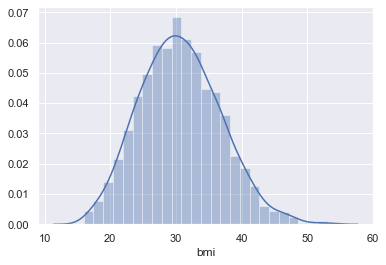

In [42]:
sns.distplot(df['bmi'])
print('The distribution of the BMI is shown below')

The distribution of the ages are shown below


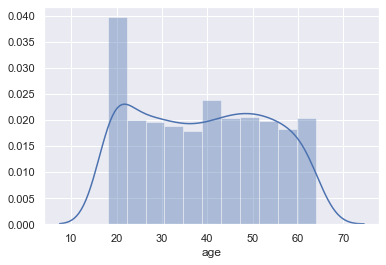

In [43]:
sns.distplot(df['age'])
print('The distribution of the ages are shown below')

The distribution of the charges are shown below


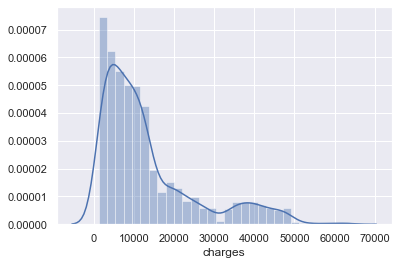

In [44]:
sns.distplot(df['charges'])
print('The distribution of the charges are shown below')

In [47]:
print('The skewness measurement of the BMI column is :',df['bmi'].skew())
print('The skewness measurement of the Age column is :',df['age'].skew())
print('The skewness measurement of the charges column is :',df['charges'].skew())

The skewness measurement of the BMI column is : 0.2840471105987448
The skewness measurement of the Age column is : 0.05567251565299186
The skewness measurement of the charges column is : 1.5158796580240388


In [131]:
print('First, we find the Inter Quartile Range of the columns by subtracting the third and first quartile of the columns')
print('The upper and lower bounds of the columns are respectively calculated by adding the IQR multiplied by 1.5 to the third      quartile and subtracting it from the first')
print('The columns are detected to have outliers if there are values below the lower bound or above the upper bound')
bmiiqr=(df['bmi'].quantile(0.75)-df['bmi'].quantile(0.25))*1.5
ageiqr=(df['age'].quantile(0.75)-df['age'].quantile(0.25))*1.5
chargeiqr=(df['charges'].quantile(0.75)-df['charges'].quantile(0.25))*1.5
bmibool=((df['bmi'].quantile(0.75)+bmiiqr)<df['bmi'].max())|((df['bmi'].quantile(0.25)-bmiiqr)>df['bmi'].min())
agebool=((df['age'].quantile(0.75)+ageiqr)<df['age'].max())|((df['age'].quantile(0.25)-ageiqr)>df['age'].min())
chargebool=((df['charges'].quantile(0.75)+chargeiqr)<df['charges'].max())|((df['charges'].quantile(0.25)-chargeiqr)>df['charges'].min())
print('If there are outliers, the boolean values will return true')
print('The outlier detecter for the bmi column shows:',bmibool,'\nThe outlier detecter for the age column:',agebool,'\nThe outlier detecter the charges column:',chargebool)

First, we find the Inter Quartile Range of the columns by subtracting the third and first quartile of the columns
The upper and lower bounds of the columns are respectively calculated by adding the IQR multiplied by 1.5 to the third      quartile and subtracting it from the first
The columns are detected to have outliers if there are values below the lower bound or above the upper bound
If there are outliers, the boolean values will return true
The outlier detecter for the bmi column shows: True 
The outlier detecter for the age column: False 
The outlier detecter the charges column: True


Distribution of gender is shown below


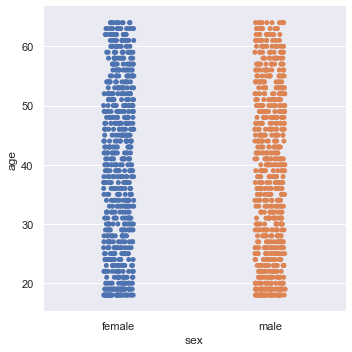

In [95]:
sns.catplot(x='sex',y='age',data=df)
print('Distribution of gender as per age is shown below')

Distribution of children as per age of the parent is shown below


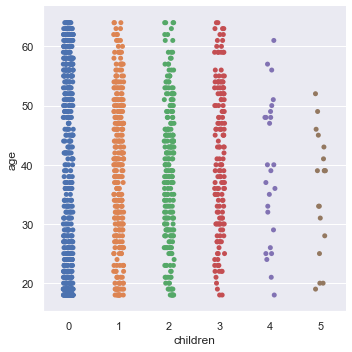

In [96]:
sns.catplot(x='children',y='age',data=df)
print('Distribution of children as per age of the parent is shown below')

Distribution of smokers and non smokers as per age is shown below


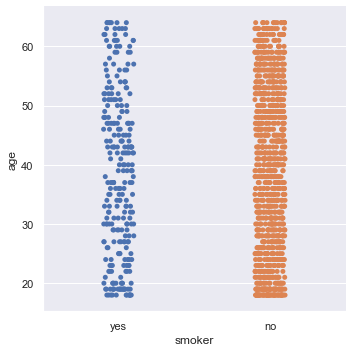

In [99]:
sns.catplot(x='smoker',y='age',data=df)
print('Distribution of smokers and non smokers as per age is shown below')

Distribution of region of each individual as per age is shown below


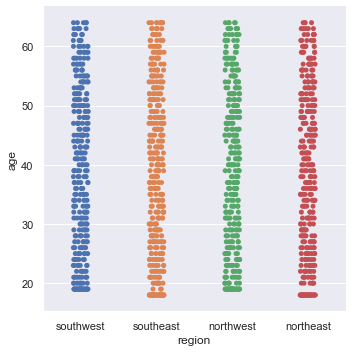

In [97]:
sns.catplot(x='region',y='age',data=df)
print('Distribution of region of each individual as per age is shown below')

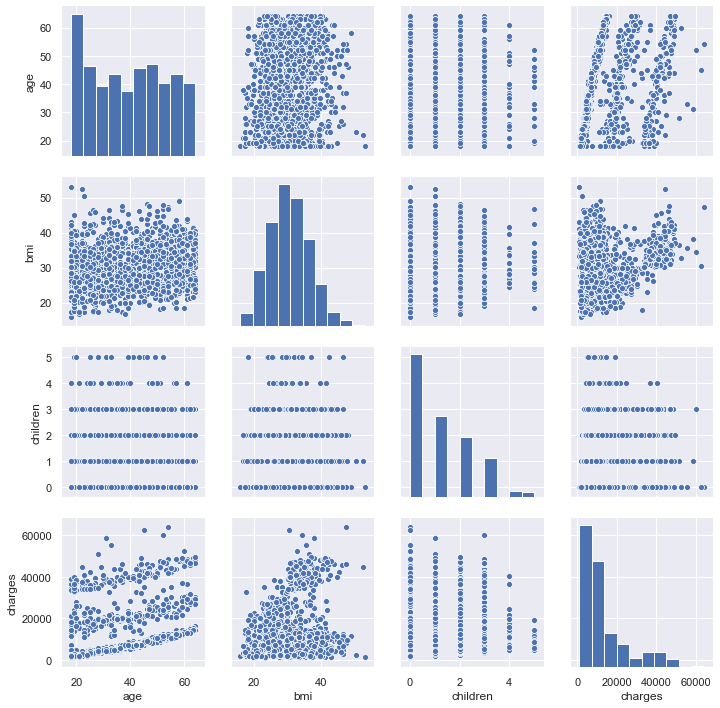

In [18]:
sns.pairplot(df)

By using the ANOVA test, we calculate the p value and compare it with the alpha value of 0.05
We will also use a boxplot for visual comparison
                sum_sq      df            F         PR(>F)
smoker    1.215199e+11     1.0  2177.614868  8.271436e-283
Residual  7.455432e+10  1336.0          NaN            NaN
The p-value is 8.271436e-283 far below the alpha value. Therefore, the charges of people who smoke differ significantly from the people who dont


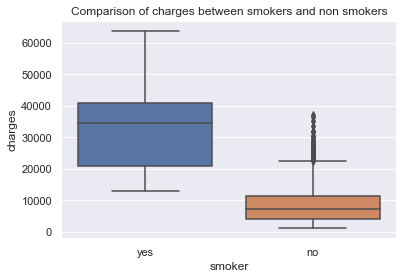

In [125]:
print('By using the ANOVA test, we calculate the p value and compare it with the alpha value of 0.05')
print('We will also use a boxplot for visual comparison')
sns.boxplot(x = "smoker", y = "charges", data = df)
plt.title('Comparison of charges between smokers and non smokers')
mod = ols('charges ~ smoker', data =df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
print('The p-value is 8.271436e-283 far below the alpha value. Therefore, the charges of people who smoke differ significantly from the people who dont')

In [118]:
print('Here, the chi-square test of variance is used to determine if the bmi is significantly different between genders')
sample_male = df[df['sex'] == 'male'].bmi  
sample_female = df[df['sex'] == 'female'].bmi
v1, v2 = np.var(sample_female) , np.var(sample_male)
n = 31  # number of samples
dof = n - 1  # degrees of freedom
chi_critical = 43.77    # critical chi_squared statistic. From the table taking alpha as 0.05
chi = (dof*v1)/v2

if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to prove a significant difference")
else:
    print("Since the test statistic is more than the critical value, we prove a significant difference")

Here, the chi-square test of variance is used to determine if the bmi is significantly different between genders
Since the test statistic is less than the critical value, we prove a significant difference


In [103]:
print('Using the z-test, we calculate the p value. If it is below 0.05, we will consider the difference significant')
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1] 
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] 
n_females = df.sex.value_counts()[1] 
n_males = df.sex.value_counts()[0]
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant between male and female smokers.')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant between male and female smokers.')

Using the z-test, we calculate the p value. If it is below 0.05, we will consider the difference significant
With a p-value of 0.0053 the difference is significant between male and female smokers.


By using the ANOVA test, we calculate the p value and compare it with the alpha value of 0.05
We will also use a boxplot for visual comparison
                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN
The p-value is 0.79376 above the alpha value. Therefore, bmi of females with under 3 children do not differ significantly


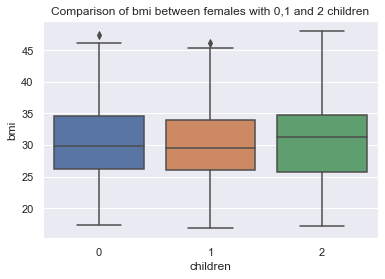

In [126]:
print('By using the ANOVA test, we calculate the p value and compare it with the alpha value of 0.05')
print('We will also use a boxplot for visual comparison')
dat=df[(df['sex']=='female') & (df['children']<3)]
sns.boxplot(x = "children", y = "bmi", data = dat)
plt.title('Comparison of bmi between females with 0,1 and 2 children')
mod = ols('bmi ~ children', data =dat).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
print('The p-value is 0.79376 above the alpha value. Therefore, bmi of females with under 3 children do not differ significantly')